In [1]:
import pandas as pd
import matplotlib as plt
plt.rcParams['font.family'] = 'SimHei' 
plt.rcParams['axes.unicode_minus'] = False
train_acc = pd.read_csv('./output/train_acc.txt',header=None).values.flatten()
val_acc = pd.read_csv('./output/val_acc.txt',header=None).values.flatten()
train_loss = pd.read_csv('./output/train_loss.txt',header=None).values.flatten()
val_loss = pd.read_csv('./output/val_loss.txt',header=None).values.flatten()

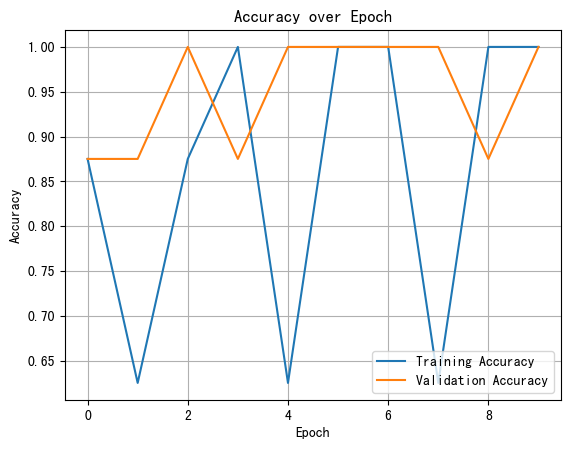

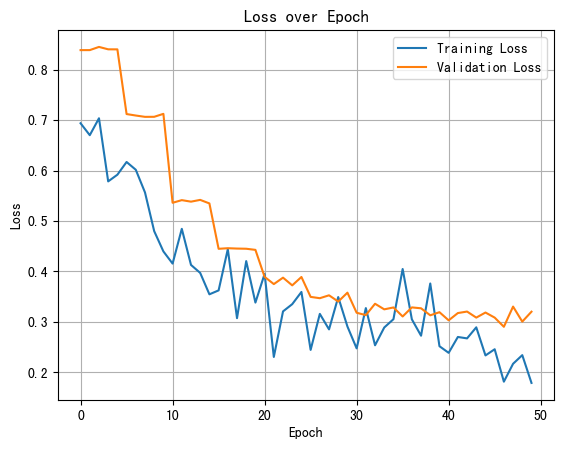

In [2]:
import matplotlib.pyplot as plt

# 设置图形尺寸
plt.plot(train_acc[::5], label='Training Accuracy')
plt.plot(val_acc[::5], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epoch')
plt.grid()
plt.show()
plt.clf()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.title('Loss over Epoch')

# 显示图形
plt.show()


In [3]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
labels=pd.read_csv('./output/labels.txt',sep='\t',header=None)
predict=labels[0].values
groundtruth=labels[1].values

In [4]:
label_column = ['煤岩比1:1宽度5', '煤岩比4:3宽度5', '煤岩比5:3宽度5', '煤岩比6:3宽度5']
report=classification_report(groundtruth, predict,target_names=label_column,output_dict=True)
report = pd.DataFrame(report)
report.to_csv('output/result.csv')
report

,煤岩比1:1宽度5,煤岩比4:3宽度5,煤岩比5:3宽度5,煤岩比6:3宽度5,accuracy,macro avg,weighted avg
precision,1.0,1.0,0.869565,1.000000,0.9625,0.967391,0.967391
recall,1.0,1.0,1.000000,0.850000,0.9625,0.962500,0.962500
f1-score,1.0,1.0,0.930233,0.918919,0.9625,0.962288,0.962288
support,100.0,100.0,100.000000,100.000000,0.9625,400.000000,400.000000


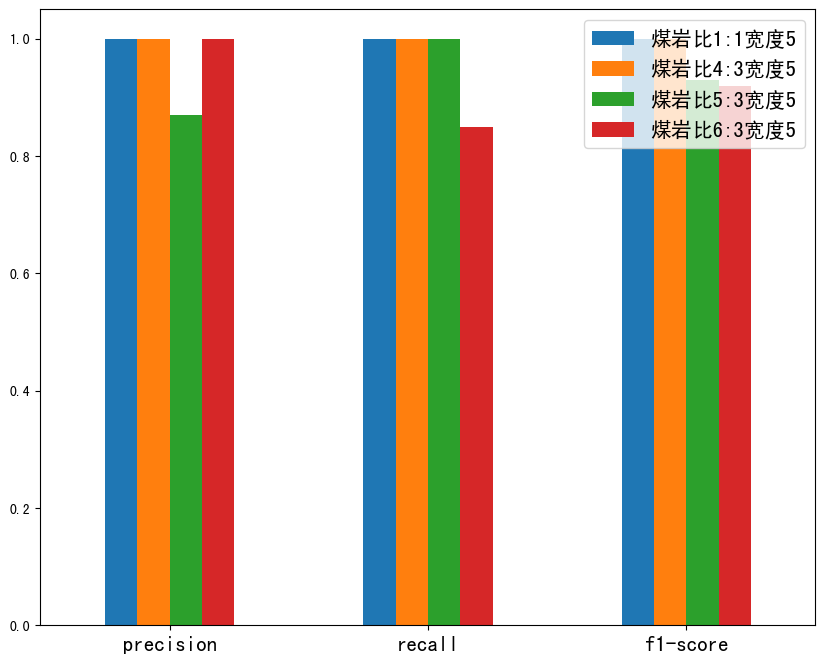

In [5]:
plt.figure(figsize=(10,8))
report.T.iloc[:4,:3].T.plot.bar(rot=0,ax=plt.gca())
plt.legend(fontsize=15)
plt.xticks(size=15)
plt.show()

In [7]:
cm = confusion_matrix(groundtruth, predict)#混淆矩阵
#annot = True 格上显示数字 ，fmt：显示数字的格式控制
ax = sns.heatmap(cm,annot=True,fmt='g',xticklabels=label_column,yticklabels=label_column,annot_kws={"fontsize":20})
#xticklabels、yticklabels指定横纵轴标签
ax.set_xlabel('Predict',size=20) #x轴
ax.set_ylabel('GroundTruth',size=20) #y轴
plt.xticks(fontsize=15) #x轴刻度的字体大小（文本包含在pd_data中了）
plt.yticks(fontsize=15) #y轴刻度的字体大小（文本包含在pd_data中了）
plt.gcf().set_size_inches(12, 6)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)
plt.show()